# Importing Libraries And Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_palette(sns.color_palette("rocket_r"))

In [2]:
df = pd.read_csv('CCs Challenge.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
# Renaming Columns
df.columns = ['ID', 'LIMIT_BALANCE', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'DEFAULT']

In [6]:
df.head()

,ID,LIMIT_BALANCE,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Preprocessing And Validation

In [7]:
## How many records have bill amount greater than the balance limit
for mon in ['APR','MAY','JUN','JUL','AUG','SEPT']:
  print(f'Bill amount in {mon} exceeded balance limit',np.sum(df['LIMIT_BALANCE'] < df[f'BILL_AMT_{mon}']),'times')

print('\nIs this normal?')

Bill amount in APR exceeded balance limit 798 times
Bill amount in MAY exceeded balance limit 820 times
Bill amount in JUN exceeded balance limit 1018 times
Bill amount in JUL exceeded balance limit 1583 times
Bill amount in AUG exceeded balance limit 1940 times
Bill amount in SEPT exceeded balance limit 2115 times

Is this normal?


In [8]:
## Working with outliers   
df.describe()

,ID,LIMIT_BALANCE,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000




> It seem strange to have a -ve bill but it is not a wrong value as bill can take on them meaning the bank owes the person money



In [9]:
print('Missing in Education:',np.sum(df['EDUCATION']==0))
print('Missing in Marriage',np.sum(df['MARRIAGE']==0))

print('Missing in Education with default',np.sum((df['EDUCATION']==0) & (df['DEFAULT']==1)))
print('Missing in Marriage with default',np.sum((df['MARRIAGE']==0) & (df['DEFAULT']==1)))

# the rows with missing info in education and marriage do not provide info about defaulting so we drop them
df = df[(df['MARRIAGE']!=0) & (df['EDUCATION']!=0)]

Missing in Education: 14
Missing in Marriage 54
Missing in Education with default 0
Missing in Marriage with default 5


# Feature Engineering

In [10]:
# A good indicator for the risk of defaulting is the utilization indicator (Balance to limit ratio)
# A feature that represents the ratio between the bill amount in sept to balance 
df['UTILIZATION_SEPT'] = df['BILL_AMT_SEPT']/df['LIMIT_BALANCE']
df['UTILIZATION_AUG'] = df['BILL_AMT_AUG']/df['LIMIT_BALANCE']
df['UTILIZATION_JUL'] = df['BILL_AMT_JUL']/df['LIMIT_BALANCE']
df['UTILIZATION_JUN'] = df['BILL_AMT_JUN']/df['LIMIT_BALANCE']
df['UTILIZATION_MAY'] = df['BILL_AMT_MAY']/df['LIMIT_BALANCE']
df['UTILIZATION_APR'] = df['BILL_AMT_APR']/df['LIMIT_BALANCE']

In [68]:
# investigating the mutual information and spearman correlation between the new feature and the target default variable
# For reference the feature pay_sept and also BILL_AMT_SEPT which has the highest feature importance is used
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils.validation import column_or_1d
print('Utilization In Sept and default mutual information: ',mutual_info_classif(df['UTILIZATION_SEPT'].to_numpy().reshape(-1, 1),column_or_1d(df['DEFAULT'].to_numpy().reshape(-1, 1)))[0])
print('Repayment Status and default mutual information: ',mutual_info_classif(df['PAY_SEPT'].to_numpy().reshape(-1, 1),column_or_1d(df['DEFAULT'].to_numpy().reshape(-1, 1)))[0])
print('Bill Amount In Sept and default mutual information: ',mutual_info_classif(df['BILL_AMT_SEPT'].to_numpy().reshape(-1, 1),column_or_1d(df['DEFAULT'].to_numpy().reshape(-1, 1)))[0])
print('')
print('Utilization In Sept and default spearman correlation: ',df[['UTILIZATION_SEPT','DEFAULT']].corr(method = 'spearman').iloc[0,1])
print('Repayment Status and default spearman correlation: ',df[['PAY_SEPT','DEFAULT']].corr(method = 'spearman').iloc[0,1])
print('Bill Amount In Sept and default spearman correlation: ',df[['BILL_AMT_SEPT','DEFAULT']].corr(method = 'spearman').iloc[0,1])
# The new feature does not seem to be very effective based on mutual information and correlation

Utilization In Sept and default mutual information:  0.01271764667684172
Repayment Status and default mutual information:  0.0762587634768288
Bill Amount In Sept and default mutual information:  0.010534194674944874

Utilization In Sept and default spearman correlation:  0.07272540927294555
Repayment Status and default spearman correlation:  0.29243736290296
Bill Amount In Sept and default spearman correlation:  -0.025844272564016817


In [12]:
# Function to return contingency table between two vars
def contingency_table(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['COND_P(DEFAULT)'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [13]:
# Having a look on the marriage status and sex relation with the target variable
sex_def_cont = contingency_table('SEX','DEFAULT')
sex_def_cont.index =  ['MALE','FEMALE']
sex_def_cont.columns = ['DEFAULT','NOT DEFAULT','COND_P(DEFAULT)']
sex_def_cont

,DEFAULT,NOT DEFAULT,COND_P(DEFAULT)
MALE,8995,2871,0.241952
FEMALE,14306,3760,0.208126


In [14]:
# Feature engineer sex_marriage column
df['SEX_MARRIAGE'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SEX_MARRIAGE'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SEX_MARRIAGE'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SEX_MARRIAGE'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SEX_MARRIAGE'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SEX_MARRIAGE'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SEX_MARRIAGE'] = 6 #divorced woman

In [15]:
# Investigating the conditional probability of defaulting given a certain class
sex_marriage_default_cont = contingency_table('SEX_MARRIAGE', 'DEFAULT')

sex_marriage_default_cont.index =  ['MARRIED_MAN','SINGLE_MAN','DIVORCED_MAN','MARRIED_WOMAN','SINGLE_WOMAN','DIVORCED_WOMAN']
sex_marriage_default_cont.columns = ['DEFAULT','NOT DEFAULT','COND_P(DEFAULT)']

sex_marriage_default_cont

,DEFAULT,NOT DEFAULT,COND_P(DEFAULT)
MARRIED_MAN,3842,1346,0.259445
SINGLE_MAN,5062,1485,0.226821
DIVORCED_MAN,91,40,0.305344
MARRIED_WOMAN,6607,1860,0.219676
SINGLE_WOMAN,7551,1856,0.197300
DIVORCED_WOMAN,148,44,0.229167


# EDA



> ### Univariate Analysis



> > #### Categorical Columns

1    11866
2    18066
Name: SEX, dtype: int64


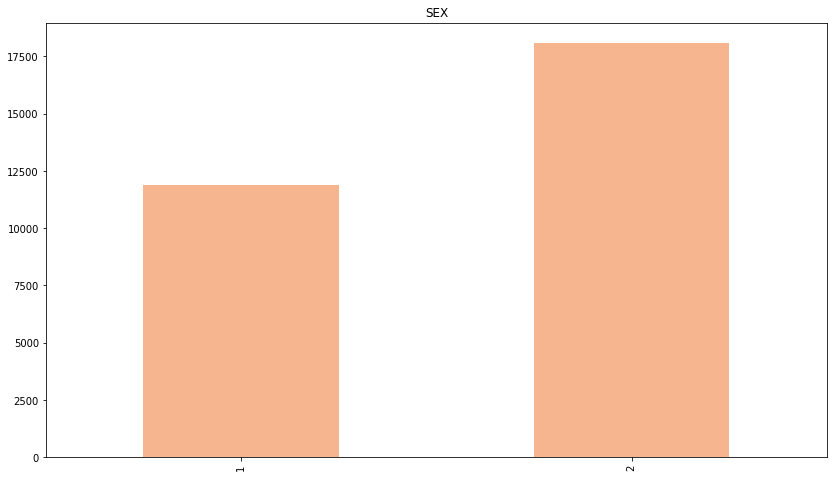

1    10581
2    14024
3     4873
4      123
5      280
6       51
Name: EDUCATION, dtype: int64


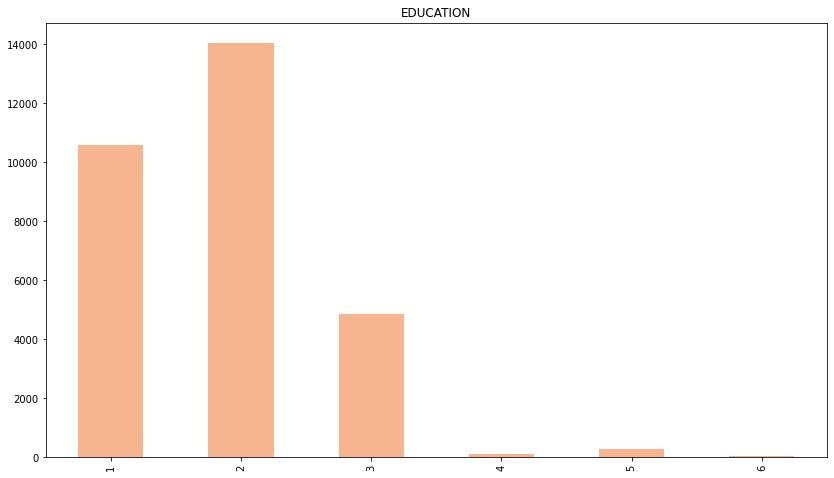

1    13655
2    15954
3      323
Name: MARRIAGE, dtype: int64


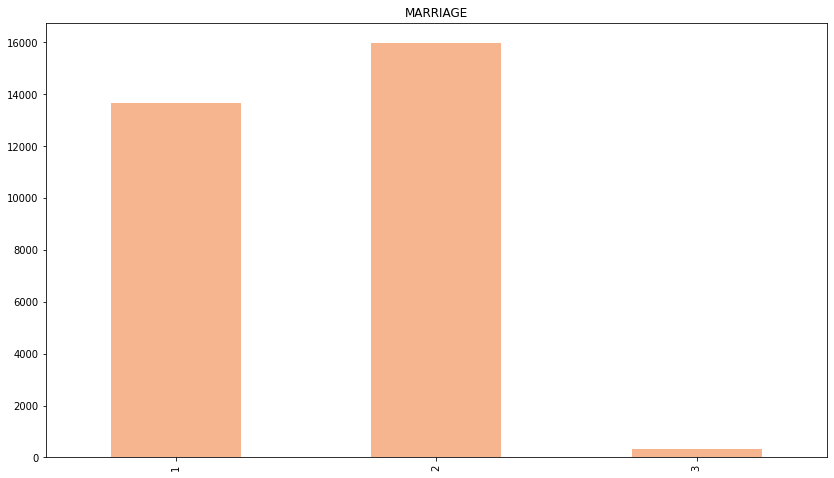

-2     2749
-1     5667
 0    14713
 1     3678
 2     2663
 3      322
 4       76
 5       25
 6       11
 7        9
 8       19
Name: PAY_SEPT, dtype: int64


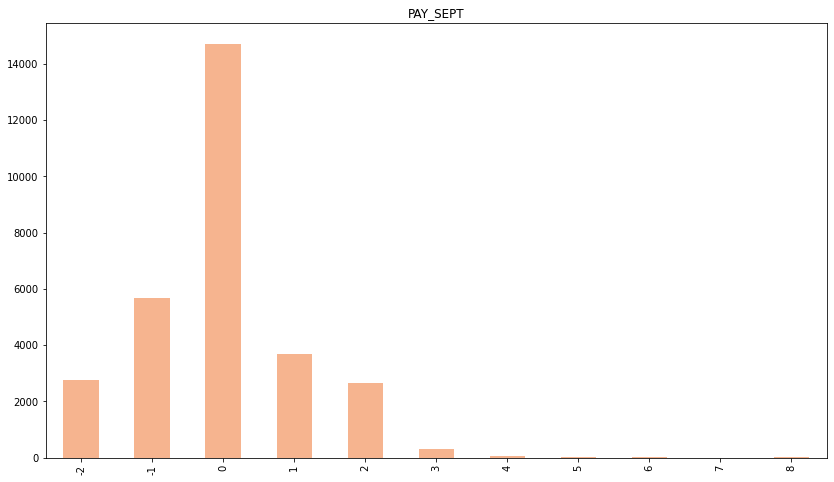

-2     3770
-1     6029
 0    15704
 1       28
 2     3919
 3      326
 4       98
 5       25
 6       12
 7       20
 8        1
Name: PAY_AUG, dtype: int64


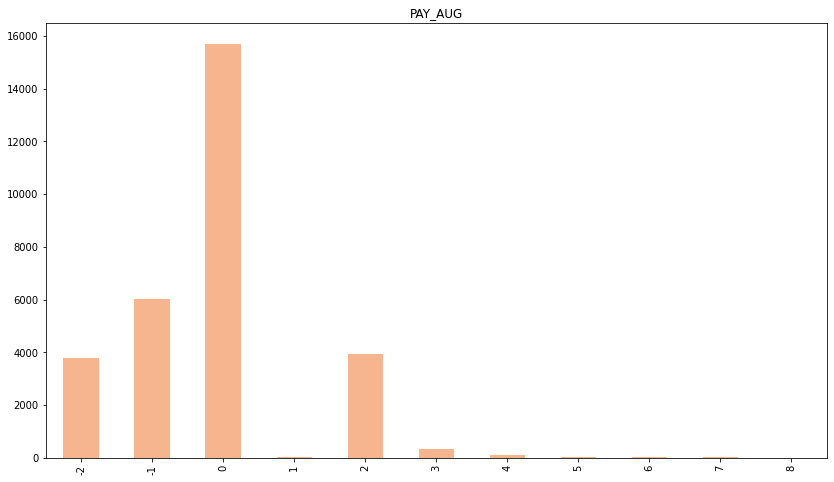

-2     4070
-1     5918
 0    15743
 1        4
 2     3809
 3      238
 4       76
 5       21
 6       23
 7       27
 8        3
Name: PAY_JUL, dtype: int64


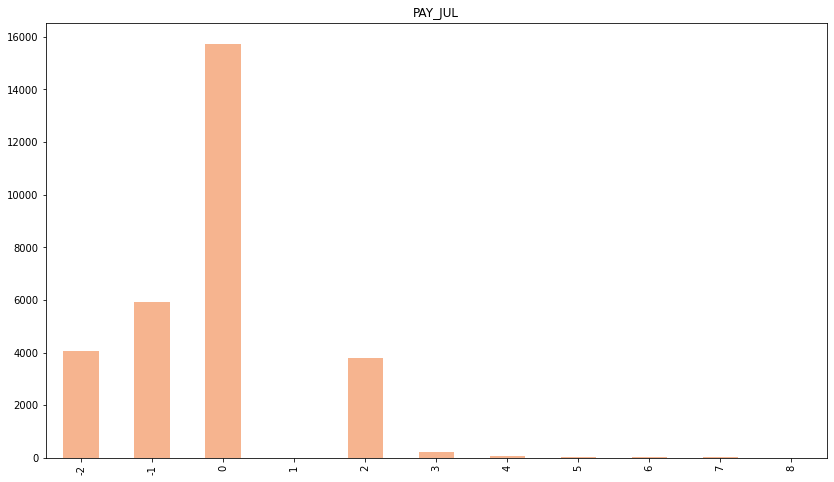

-2     4332
-1     5667
 0    16433
 1        2
 2     3149
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: PAY_JUN, dtype: int64


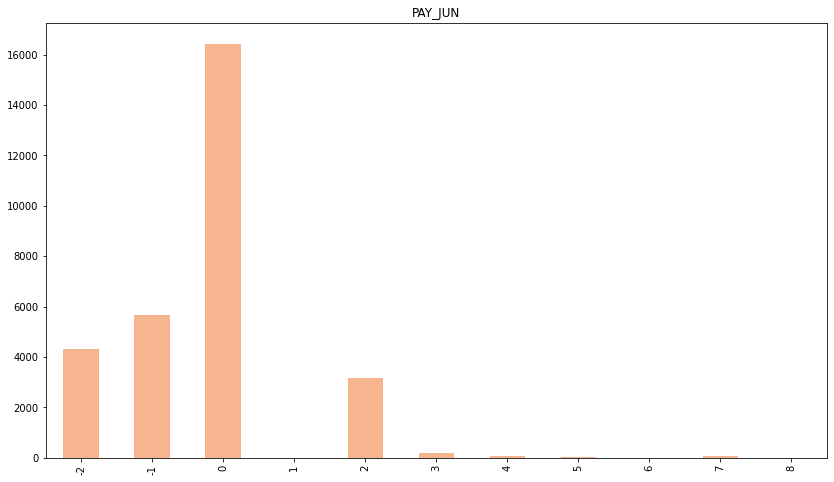

-2     4530
-1     5521
 0    16919
 2     2621
 3      177
 4       84
 5       17
 6        4
 7       58
 8        1
Name: PAY_MAY, dtype: int64


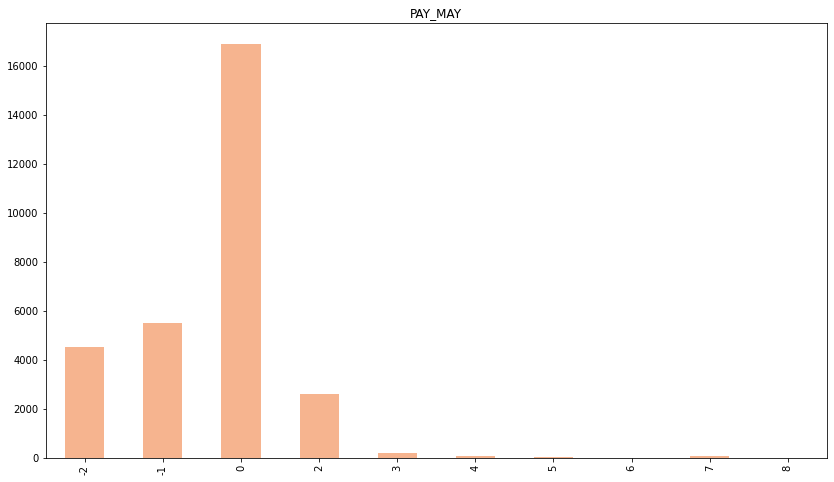

-2     4877
-1     5719
 0    16264
 2     2760
 3      183
 4       49
 5       13
 6       19
 7       46
 8        2
Name: PAY_APR, dtype: int64


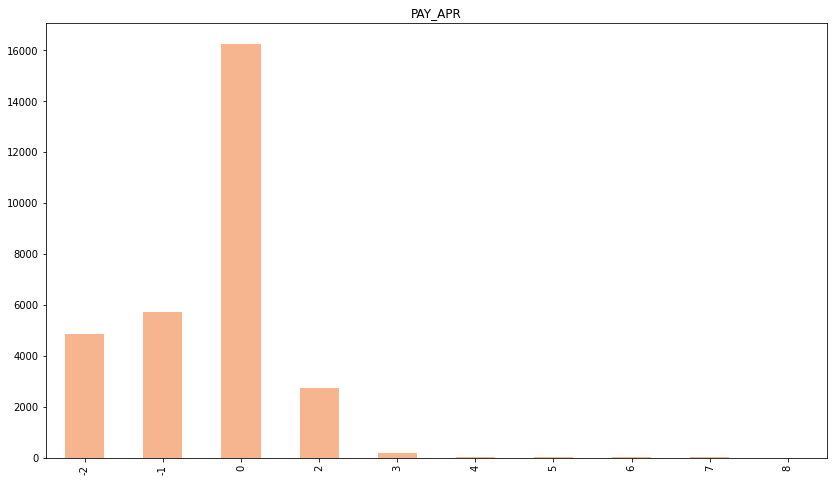

In [16]:
# Working with categorical data
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for col in cat_cols:
  print(df[col].value_counts().sort_index())
  _ = df[col].value_counts().sort_index().plot(kind='bar',
                                      figsize=(14,8),
                                      title=col)
  _ = plt.show()

> > #### Numerical Columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


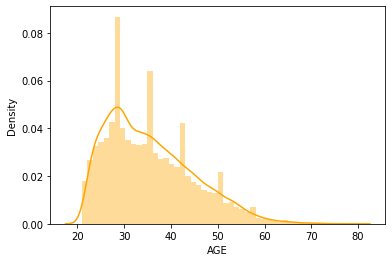

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


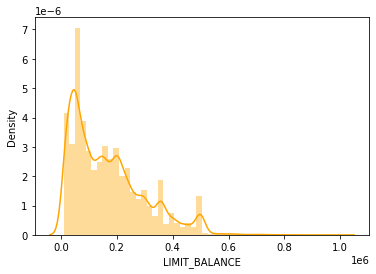

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


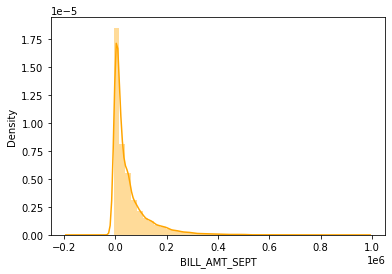

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


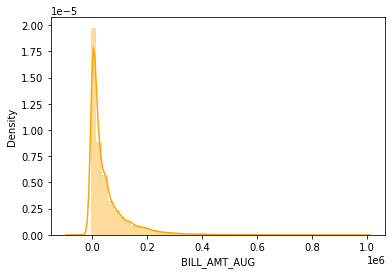

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


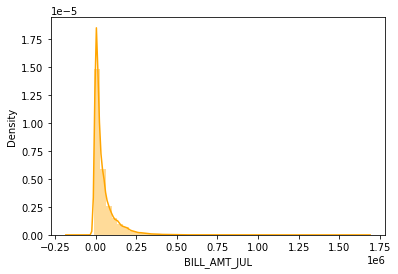

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


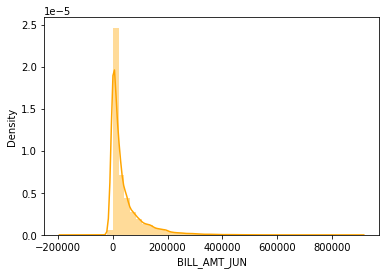

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


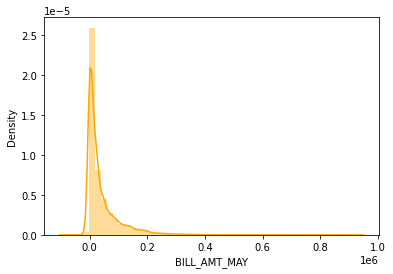

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


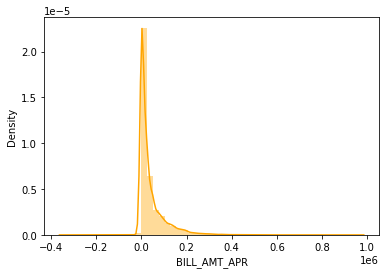

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


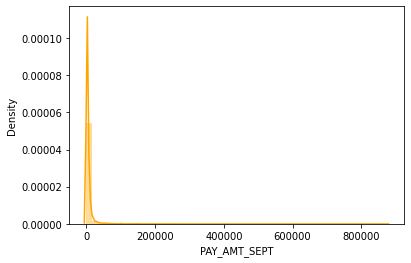

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


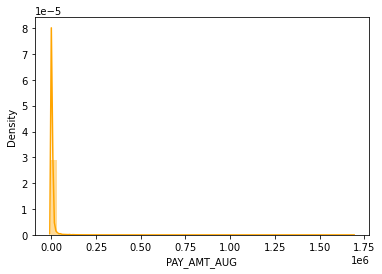

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


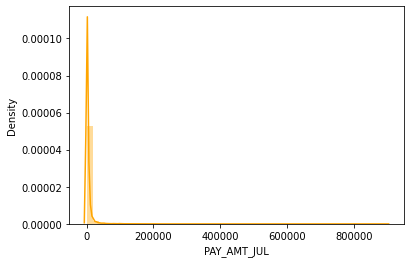

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


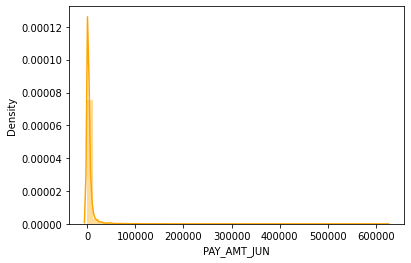

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


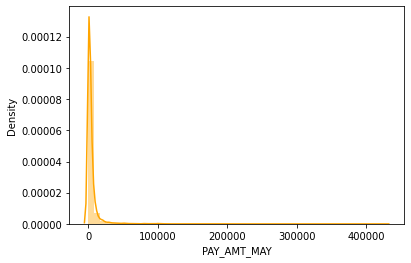

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


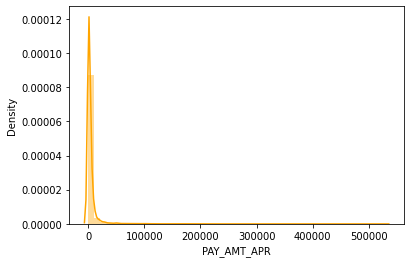

In [17]:
# Working with numerical data
num_cols = ['AGE','LIMIT_BALANCE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

for col in num_cols:
    # print(df[[col]].describe())
    # fig, ax = plt.subplots()
    # df[col].plot.kde(ax=ax, legend=False, title=f'{col.capitalize()} distribution', color="g")
    # df[col].plot.hist(density=True, ax=ax)
    # ax.set_ylabel('Freq')
    # ax.set_xlabel(col)
    # ax.set_xlim(left = np.min(df[col])) 
    # _ = plt.show()
    _ = sns.distplot(df[col],color='orange')
    _ = plt.show()

> ### Features Importance

In [18]:
# Creating our separate test set
x_train = df.sample(frac=1,random_state=0).iloc[:25000,:].reset_index().drop('index',axis=1).drop(['ID','DEFAULT'],axis=1)
y_train = df.sample(frac=1,random_state=0).iloc[:25000,:].reset_index().drop('index',axis=1)['DEFAULT']
x_cols = x_train.columns

x_test = df.sample(frac=1,random_state=0).iloc[25000:,:].reset_index().drop('index',axis=1).drop(['ID','DEFAULT'],axis=1)
y_test = df.sample(frac=1,random_state=0).iloc[25000:,:].reset_index().drop('index',axis=1)['DEFAULT']

In [19]:
print(y_train.value_counts())
print(y_test.value_counts())

0    19441
1     5559
Name: DEFAULT, dtype: int64
0    3860
1    1072
Name: DEFAULT, dtype: int64


In [20]:
# First we can perform logistic regression with L1 penalty to have a sense of which features have higher importance
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
clf = LogisticRegression(penalty ='l1', solver='liblinear',random_state=0).fit(x_train, y_train)

In [21]:
# Features Coefficients
clf.coef_

array([[-0.18119686,  0.        , -0.07825002, -0.05416513,  0.07554434,
         0.65892067,  0.1263117 ,  0.08164865,  0.01532524,  0.03463094,
         0.00147404, -0.00834653,  0.05142994,  0.01233603,  0.02961526,
         0.        , -0.08021257, -0.21521518, -0.19716868, -0.06475661,
        -0.03196939, -0.05486217, -0.02704169, -0.38042279,  0.13023364,
        -0.00606766,  0.06594666, -0.0649018 ,  0.12378807, -0.06458356]])

In [22]:
# Get the indices of the sorted features by importance in general
sorted_importance_idx = [i[0] for i in sorted(enumerate(np.absolute(clf.coef_).squeeze()),reverse=True, key=lambda x:x[1])]
print('Features weights:\n',clf.coef_.squeeze()[sorted_importance_idx])
print('\nFeatures:\n',x_cols[sorted_importance_idx])

Features weights:
 [ 0.65892067 -0.38042279 -0.21521518 -0.19716868 -0.18119686  0.13023364
  0.1263117   0.12378807  0.08164865 -0.08021257 -0.07825002  0.07554434
  0.06594666 -0.0649018  -0.06475661 -0.06458356 -0.05486217 -0.05416513
  0.05142994  0.03463094 -0.03196939  0.02961526 -0.02704169  0.01532524
  0.01233603 -0.00834653 -0.00606766  0.00147404  0.          0.        ]

Features:
 Index(['PAY_SEPT', 'UTILIZATION_SEPT', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'LIMIT_BALANCE', 'UTILIZATION_AUG', 'PAY_AUG', 'UTILIZATION_APR',
       'PAY_JUL', 'BILL_AMT_APR', 'EDUCATION', 'AGE', 'UTILIZATION_JUN',
       'UTILIZATION_MAY', 'PAY_AMT_JUL', 'SEX_MARRIAGE', 'PAY_AMT_MAY',
       'MARRIAGE', 'BILL_AMT_AUG', 'PAY_MAY', 'PAY_AMT_JUN', 'BILL_AMT_JUN',
       'PAY_AMT_APR', 'PAY_JUN', 'BILL_AMT_JUL', 'BILL_AMT_SEPT',
       'UTILIZATION_JUL', 'PAY_APR', 'SEX', 'BILL_AMT_MAY'],
      dtype='object')


* It is clear that the payment status of the customer in september has the biggest influence on the default state as it increases (payment delay) _The higher the more probable the customer will not default_
* The bill amount in the current month has a great influence too but in this case _the higher it is the more probable the customer will default_
* Strangely, the pay amount is not the most important feature so it seems like it doesn't matter how big repays the customer makes, __yet how frequent they repay__. 
* We can do extra bivariate analysis on the most significant features

In [23]:
# Working with negative coeffiecients that have high influence on predicting not-default
neg_idx = np.flatnonzero(clf.coef_.squeeze() < 0)
neg_coeffs = clf.coef_[:,np.flatnonzero(clf.coef_.squeeze() < 0)].squeeze()
sorted_neg_idx = [i[0] for i in sorted(enumerate(np.absolute(neg_coeffs).squeeze()),reverse=True, key=lambda x:x[1])]
print('Features weights:\n',clf.coef_.squeeze()[neg_idx[sorted_neg_idx]])
print('\nFeatures:\n',x_cols[neg_idx[sorted_neg_idx]].values)

Features weights:
 [-0.38042279 -0.21521518 -0.19716868 -0.18119686 -0.08021257 -0.07825002
 -0.0649018  -0.06475661 -0.06458356 -0.05486217 -0.05416513 -0.03196939
 -0.02704169 -0.00834653 -0.00606766]

Features:
 ['UTILIZATION_SEPT' 'PAY_AMT_SEPT' 'PAY_AMT_AUG' 'LIMIT_BALANCE'
 'BILL_AMT_APR' 'EDUCATION' 'UTILIZATION_MAY' 'PAY_AMT_JUL' 'SEX_MARRIAGE'
 'PAY_AMT_MAY' 'MARRIAGE' 'PAY_AMT_JUN' 'PAY_AMT_APR' 'BILL_AMT_SEPT'
 'UTILIZATION_JUL']


> * We can see that as the _bill amount in september_, _pay amount in august_, and _pay amount in september_ __decreases the chance of defaulting__ 

In [24]:
# Working with positive coeffiecients that have high influence on predicting not-default
pos_idx = np.flatnonzero(clf.coef_.squeeze() >= 0)
pos_coeffs = clf.coef_[:,np.flatnonzero(clf.coef_.squeeze() >= 0)].squeeze()
sorted_pos_idx = [i[0] for i in sorted(enumerate(np.absolute(pos_coeffs).squeeze()),reverse=True, key=lambda x:x[1])]
print('Features weights:\n',clf.coef_.squeeze()[pos_idx[sorted_pos_idx]])
print('\nFeatures:\n',x_cols[pos_idx[sorted_pos_idx]].values)

Features weights:
 [0.65892067 0.13023364 0.1263117  0.12378807 0.08164865 0.07554434
 0.06594666 0.05142994 0.03463094 0.02961526 0.01532524 0.01233603
 0.00147404 0.         0.        ]

Features:
 ['PAY_SEPT' 'UTILIZATION_AUG' 'PAY_AUG' 'UTILIZATION_APR' 'PAY_JUL' 'AGE'
 'UTILIZATION_JUN' 'BILL_AMT_AUG' 'PAY_MAY' 'BILL_AMT_JUN' 'PAY_JUN'
 'BILL_AMT_JUL' 'PAY_APR' 'SEX' 'BILL_AMT_MAY']


> ### Balance Limit Classes

In [25]:
# Quantiles to look at
quants = [x/20 for x in range(1,19) ] + [x/200+0.9 for x in range(1,19) ] + [x/2000+0.99 for x in range(1,19) ] + [x/20000+0.999 for x in range(1,19) ]

In [26]:
# Couldn't find info about credit card limits in banks in egypt that suits the data
# Based on the quantiles below, the quantile chosen to split on 
# 0.25:50,000 ; 0.4:100,000 ; 0.65:200,000 ; 0.85:310,000 ; 0.993: 500,000
val_quants = np.quantile(df['LIMIT_BALANCE'],quants,interpolation='higher')
for i in range(len(quants)):
  if quants[i] not in [0.25,0.4,0.65,0.85,0.993]:
    continue
  print(round(quants[i],6),':',round(val_quants[i]))

0.25 : 50000
0.4 : 100000
0.65 : 200000
0.85 : 310000
0.993 : 500000


In [27]:
def limit_balance_class(limit_balance):
  if  limit_balance<=50000:
    return 6
  if  limit_balance<=100000:
    return 5
  if  limit_balance<=200000:
    return 4
  if  limit_balance<=310000:
    return 3
  if  limit_balance<=500000:
    return 2
  return 1
df['LIMIT_BALANCE'].map(limit_balance_class).value_counts().sort_index()

1     206
2    4082
3    5317
4    7855
5    4810
6    7662
Name: LIMIT_BALANCE, dtype: int64

In [28]:
# Add the column to the df
df['BALANCE_CLASS'] = df['LIMIT_BALANCE'].map(limit_balance_class)

In [29]:
# Analysis on the balance class with the default flag
# Expected loss from each class based on septemper bill amount given defaulted
# We can consider this as a random variable that takes on those values
for i in range(1,7):
  exp_default_loss = df[ (df['BALANCE_CLASS']==i) & (df['DEFAULT']==1)]['BILL_AMT_SEPT'].mean()
  print(f'Class{i} Expected loss if defaulted',round(exp_default_loss))

Class1 Expected loss if defaulted 306195
Class2 Expected loss if defaulted 96513
Class3 Expected loss if defaulted 72801
Class4 Expected loss if defaulted 60033
Class5 Expected loss if defaulted 45572
Class6 Expected loss if defaulted 21127


In [30]:
# We also need to consider the margin probability of each class P(Class=Class_i)
for i in range(1,7):
  class_perc = df[df['BALANCE_CLASS']==i].shape[0]
  print(f'Class{i} Expected loss if defaulted',round(class_perc/df.shape[0],3))

Class1 Expected loss if defaulted 0.007
Class2 Expected loss if defaulted 0.136
Class3 Expected loss if defaulted 0.178
Class4 Expected loss if defaulted 0.262
Class5 Expected loss if defaulted 0.161
Class6 Expected loss if defaulted 0.256


In [31]:
# Inspecting the conditional probability of defaulting given a certain class P(Default|Class_i)
for i in range(1,7):
  total_per_class = df[df['BALANCE_CLASS']==i].shape[0]
  default_per_class = df[ (df['BALANCE_CLASS']==i) & (df['DEFAULT']==1)].shape[0]
  print(f'Class{i} default percentage',round(default_per_class / total_per_class,2))

Class1 default percentage 0.11
Class2 default percentage 0.14
Class3 default percentage 0.16
Class4 default percentage 0.2
Class5 default percentage 0.26
Class6 default percentage 0.32


> There is no class with high conditional probability except for 5,6, those classes luckily have the least balance and also the prop of default is not that high. This can explain why the limit_balance was not among the features being labeled as important by the logistic regression with L1 penalty


> * We can see that as the _pay status in september_, _bill amount in august_, and _pay status in august_ __increases the chance of defaulting__ 

> ### Bivariate Analysis

> > #### Payment Status in September (+VE coeff)

In [32]:
# Percentage of default with respect to each status of september
for i in range(-2,9):
  print(f'Sept status {i} count:',df['PAY_SEPT'].value_counts().sort_index()[i])
  print(f'Sept status {i} defaulted perc:',df[df['DEFAULT']==1]['PAY_SEPT'].value_counts().sort_index()[i]/df['PAY_SEPT'].value_counts().sort_index()[i])
  print('')

Sept status -2 count: 2749
Sept status -2 defaulted perc: 0.13241178610403784

Sept status -1 count: 5667
Sept status -1 defaulted perc: 0.16834303864478561

Sept status 0 count: 14713
Sept status 0 defaulted perc: 0.12818595799632979

Sept status 1 count: 3678
Sept status 1 defaulted perc: 0.3401305057096248

Sept status 2 count: 2663
Sept status 2 defaulted perc: 0.692076605332332

Sept status 3 count: 322
Sept status 3 defaulted perc: 0.7577639751552795

Sept status 4 count: 76
Sept status 4 defaulted perc: 0.6842105263157895

Sept status 5 count: 25
Sept status 5 defaulted perc: 0.52

Sept status 6 count: 11
Sept status 6 defaulted perc: 0.5454545454545454

Sept status 7 count: 9
Sept status 7 defaulted perc: 0.7777777777777778

Sept status 8 count: 19
Sept status 8 defaulted perc: 0.5789473684210527



In [33]:
# Of all the people with payment status in september 2 month or more how many defaulted 
defaulted_perc__status_2m_sept = df[df['PAY_SEPT']>=2]['DEFAULT'].value_counts()[1] / df[df['PAY_SEPT']>=2].shape[0]
round(defaulted_perc__status_2m_sept,2)

0.7

In [34]:
# Actual default percentage
defaulted_perc = df['DEFAULT'].value_counts()[1] / df.shape[0]
round(defaulted_perc,2)

0.22

> > #### Bill Amount in August (+VE COEFF)

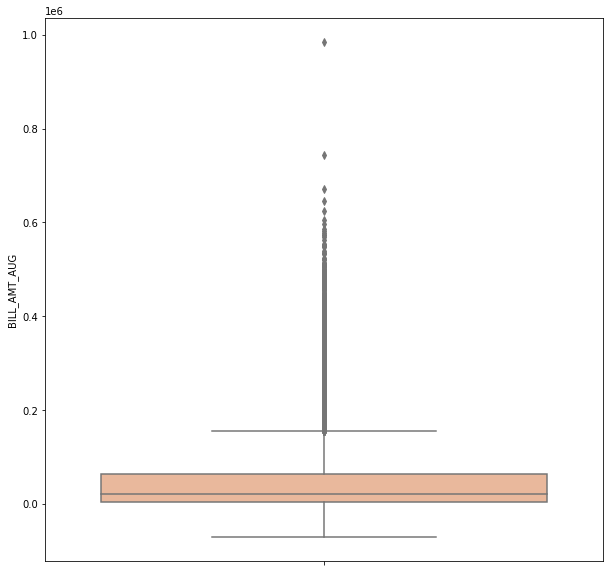

In [69]:
# Box plotting the data
_ = sns.boxplot(y='BILL_AMT_AUG', data=df)

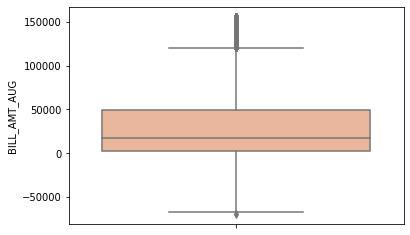

In [35]:
# Box Plotting Without outliers
third_quar = df['BILL_AMT_AUG'].quantile(0.75)
first_quar = df['BILL_AMT_AUG'].quantile(0.25)
aug_bill_IQR = third_quar - first_quar

_ = sns.boxplot(y='BILL_AMT_AUG', data=df[df['BILL_AMT_AUG'] <= (1.5*aug_bill_IQR + third_quar)])

In [36]:
# Outliers
df[df['BILL_AMT_AUG'] > (1.5*aug_bill_IQR + third_quar)]['DEFAULT'].value_counts()

0    1896
1     492
Name: DEFAULT, dtype: int64

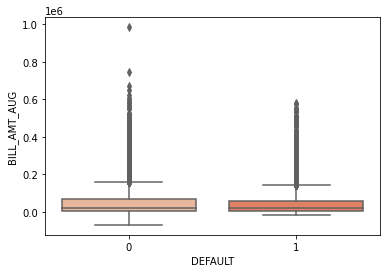

In [37]:
# Box plotting to inspect outliers
_ = sns.boxplot(x='DEFAULT', y='BILL_AMT_AUG', data=df)

In [72]:
# How many outliers are found?
first_quar = df[df['DEFAULT']==0]['BILL_AMT_AUG'].quantile(0.25)
third_quar = df[df['DEFAULT']==0]['BILL_AMT_AUG'].quantile(0.75)


aug_bill_default_IQR = third_quar - first_quar
print('Non defaulters number of outliers regarding august bill',round(df[df['DEFAULT']==0][df['BILL_AMT_AUG']> (1.5*aug_bill_default_IQR + third_quar)].shape[0]))

first_quar = df[df['DEFAULT']==1]['BILL_AMT_AUG'].quantile(0.25)
third_quar = df[df['DEFAULT']==1]['BILL_AMT_AUG'].quantile(0.75)


aug_bill_not_default_IQR = third_quar - first_quar
print('Defaulters number of outliers regarding august bill',round(df[df['DEFAULT']==1][df['BILL_AMT_AUG']> (1.5*aug_bill_not_default_IQR+ third_quar)].shape[0]),'\n\n\n')

Non defaulters number of outliers regarding august bill 1819
Defaulters number of outliers regarding august bill 568 





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


> > #### Utilization across months

In [39]:
df.columns

Index(['ID', 'LIMIT_BALANCE', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEFAULT',
       'UTILIZATION_SEPT', 'UTILIZATION_AUG', 'UTILIZATION_JUL',
       'UTILIZATION_JUN', 'UTILIZATION_MAY', 'UTILIZATION_APR', 'SEX_MARRIAGE',
       'BALANCE_CLASS'],
      dtype='object')

In [40]:
# Utilization Across Months for the non defaulters
df[df['DEFAULT'] == 0][['UTILIZATION_SEPT', 'UTILIZATION_AUG', 'UTILIZATION_JUL',
       'UTILIZATION_JUN', 'UTILIZATION_MAY', 'UTILIZATION_APR']].mean(axis=0)

UTILIZATION_SEPT    0.405323
UTILIZATION_AUG     0.390171
UTILIZATION_JUL     0.370676
UTILIZATION_JUN     0.337090
UTILIZATION_MAY     0.311229
UTILIZATION_APR     0.296245
dtype: float64

In [41]:
# Utilization Across Months for the whole base for the defaulters
df[df['DEFAULT'] == 1][['UTILIZATION_SEPT', 'UTILIZATION_AUG', 'UTILIZATION_JUL',
       'UTILIZATION_JUN', 'UTILIZATION_MAY', 'UTILIZATION_APR']].mean(axis=0)

UTILIZATION_SEPT    0.490501
UTILIZATION_AUG     0.486506
UTILIZATION_JUL     0.469668
UTILIZATION_JUN     0.439860
UTILIZATION_MAY     0.411619
UTILIZATION_APR     0.398637
dtype: float64

In [43]:
# Per class utilization
df[df['DEFAULT'] == 0][['BALANCE_CLASS', 'UTILIZATION_APR','UTILIZATION_MAY',
                        'UTILIZATION_JUN', 'UTILIZATION_JUL','UTILIZATION_AUG','UTILIZATION_SEPT']].groupby('BALANCE_CLASS').mean().transpose()

BALANCE_CLASS,1,2,3,4,5,6
UTILIZATION_APR,0.207385,0.151761,0.198559,0.270170,0.377339,0.456875
UTILIZATION_MAY,0.210789,0.159111,0.204613,0.279267,0.387693,0.495372
UTILIZATION_JUN,0.223498,0.170992,0.218039,0.298533,0.425187,0.541838
UTILIZATION_JUL,0.240062,0.181192,0.236289,0.324828,0.484272,0.596373
UTILIZATION_AUG,0.242759,0.184818,0.248390,0.342423,0.516211,0.627314
UTILIZATION_SEPT,0.251181,0.194466,0.258322,0.357099,0.544952,0.642185


In [46]:
# Utilization rates withou first class
df[df['DEFAULT'] == 0][['BALANCE_CLASS', 'UTILIZATION_APR','UTILIZATION_MAY',
                        'UTILIZATION_JUN', 'UTILIZATION_JUL','UTILIZATION_AUG','UTILIZATION_SEPT']].groupby('BALANCE_CLASS').mean().transpose().drop(1,axis=1)

BALANCE_CLASS,2,3,4,5,6
UTILIZATION_APR,0.151761,0.198559,0.270170,0.377339,0.456875
UTILIZATION_MAY,0.159111,0.204613,0.279267,0.387693,0.495372
UTILIZATION_JUN,0.170992,0.218039,0.298533,0.425187,0.541838
UTILIZATION_JUL,0.181192,0.236289,0.324828,0.484272,0.596373
UTILIZATION_AUG,0.184818,0.248390,0.342423,0.516211,0.627314
UTILIZATION_SEPT,0.194466,0.258322,0.357099,0.544952,0.642185


In [47]:
df[df['DEFAULT'] == 1][['BALANCE_CLASS', 'UTILIZATION_APR','UTILIZATION_MAY',
                        'UTILIZATION_JUN', 'UTILIZATION_JUL','UTILIZATION_AUG','UTILIZATION_SEPT']].groupby('BALANCE_CLASS').mean().transpose()

BALANCE_CLASS,1,2,3,4,5,6
UTILIZATION_APR,0.383459,0.185998,0.222458,0.326793,0.453981,0.524664
UTILIZATION_MAY,0.404869,0.201418,0.230385,0.331553,0.459289,0.547819
UTILIZATION_JUN,0.459684,0.208277,0.249055,0.344385,0.503016,0.585757
UTILIZATION_JUL,0.502757,0.224644,0.265348,0.367557,0.544370,0.621434
UTILIZATION_AUG,0.519944,0.235869,0.276633,0.387275,0.567854,0.636262
UTILIZATION_SEPT,0.542835,0.246094,0.287500,0.397899,0.573360,0.631368


In [48]:
# Utilization rate for first class only
df[df['DEFAULT'] == 1][['BALANCE_CLASS', 'UTILIZATION_APR','UTILIZATION_MAY',
                        'UTILIZATION_JUN', 'UTILIZATION_JUL','UTILIZATION_AUG','UTILIZATION_SEPT']].groupby('BALANCE_CLASS').mean().transpose()[1]

UTILIZATION_APR     0.383459
UTILIZATION_MAY     0.404869
UTILIZATION_JUN     0.459684
UTILIZATION_JUL     0.502757
UTILIZATION_AUG     0.519944
UTILIZATION_SEPT    0.542835
Name: 1, dtype: float64

# Customer Segmentation

In [49]:
# Using the 7 most predictive features we can cluster users who defaulted 
# into 4 clusters for instance then apply dimensionality reduction so we can visualize them

x_clustering = df[df['DEFAULT'] == 1][['PAY_SEPT', 'BILL_AMT_SEPT', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'UTILIZATION_AUG', 'BILL_AMT_AUG', 'UTILIZATION_SEPT','LIMIT_BALANCE']]

# Clustering 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_clustering)

# Principal Components
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_clustering)
pca_features = pca.transform(x_clustering)

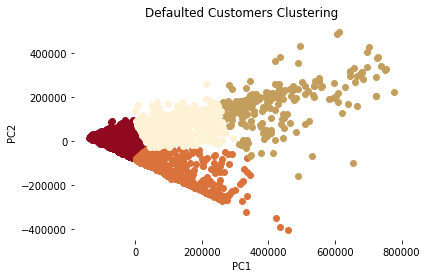

In [50]:
from pylab import rcParams
from pylab import *
axes(frameon = 0)
rcParams['figure.figsize'] = 10, 10
_ = plt.scatter(pca_features[np.where(kmeans.labels_ == 0)][:,0],pca_features[np.where(kmeans.labels_ == 0)][:,1],color='#91091e')
_ = plt.scatter(pca_features[np.where(kmeans.labels_ == 1)][:,0],pca_features[np.where(kmeans.labels_ == 1)][:,1],color='#da723c')
_ = plt.scatter(pca_features[np.where(kmeans.labels_ == 2)][:,0],pca_features[np.where(kmeans.labels_ == 2)][:,1],color='#c39e5c')
_ = plt.scatter(pca_features[np.where(kmeans.labels_ == 3)][:,0],pca_features[np.where(kmeans.labels_ == 3)][:,1],color='#fdf1d6')
_ = plt.xlabel('PC1')
_ = plt.ylabel('PC2')
_ = plt.title('Defaulted Customers Clustering')
_ = plt.show()

Text(0.5, 1.0, 'corr_heat_map')

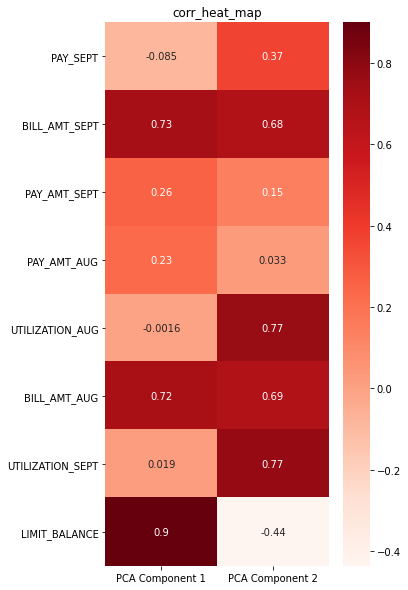

In [51]:
# Inspecting which columns do these components correlate with
x_clustering['PCA Component 1'] = pca_features[:,0]
x_clustering['PCA Component 2'] = pca_features[:,1]

fig, heatmap = plt.subplots(figsize = (5,10))
heatmap = sns.heatmap(x_clustering.corr(method='pearson').iloc[:8,8:], cmap='Reds', annot=True)
heatmap.set_title('corr_heat_map')

# Modeling

> ### Random Forrest

In [52]:
# Creating our separate test set
x_train = df.sample(frac=1,random_state=0).iloc[:25000,:].reset_index().drop('index',axis=1).drop(['ID','DEFAULT'],axis=1)
y_train = df.sample(frac=1,random_state=0).iloc[:25000,:].reset_index().drop('index',axis=1)['DEFAULT']
x_cols = x_train.columns

x_test = df.sample(frac=1,random_state=0).iloc[25000:,:].reset_index().drop('index',axis=1).drop(['ID','DEFAULT'],axis=1)
y_test = df.sample(frac=1,random_state=0).iloc[25000:,:].reset_index().drop('index',axis=1)['DEFAULT']

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [56]:
forest_importances.values

array([0.00662847, 0.00809363, 0.01138517, 0.01408596, 0.01533424,
       0.01541834, 0.01710137, 0.01770291, 0.02964754, 0.03064769,
       0.03100374, 0.03301002, 0.03313577, 0.03343527, 0.03352188,
       0.03434682, 0.03442617, 0.034548  , 0.0359319 , 0.03598601,
       0.0361311 , 0.03718243, 0.03719139, 0.03797364, 0.03820195,
       0.03996287, 0.04074134, 0.04307701, 0.04924128, 0.05176694,
       0.08313915])

In [57]:
pred = forest.predict(x_test)

In [58]:
from sklearn.metrics import f1_score, accuracy_score
accuracy_score(y_test,pred)

0.8126520681265207

In [59]:
forest_importances.index

Index(['SEX', 'MARRIAGE', 'BALANCE_CLASS', 'PAY_APR', 'SEX_MARRIAGE',
       'EDUCATION', 'PAY_JUN', 'PAY_MAY', 'PAY_JUL', 'PAY_AMT_MAY',
       'PAY_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_JUL',
       'BILL_AMT_JUN', 'PAY_AMT_AUG', 'PAY_AMT_APR', 'BILL_AMT_JUL',
       'BILL_AMT_AUG', 'UTILIZATION_JUN', 'UTILIZATION_MAY', 'UTILIZATION_APR',
       'LIMIT_BALANCE', 'UTILIZATION_JUL', 'PAY_AMT_SEPT', 'UTILIZATION_AUG',
       'BILL_AMT_SEPT', 'UTILIZATION_SEPT', 'PAY_AUG', 'AGE', 'PAY_SEPT'],
      dtype='object')

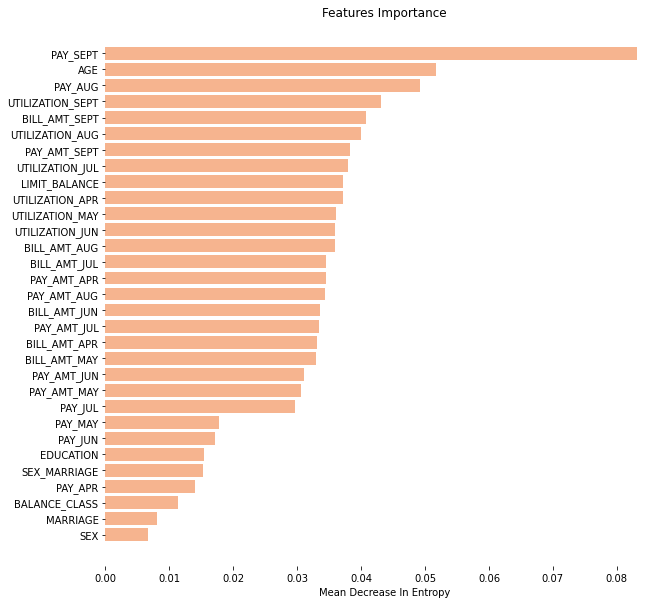

In [60]:
axes(frameon = 0)
rcParams['figure.figsize'] = 10, 10
_ = plt.barh(forest_importances.index,forest_importances.values)
_ = plt.xlabel('Mean Decrease In Entropy')
_ = plt.title('Features Importance')

In [61]:
f1_score(y_test,pred)

0.46279069767441855

# Acceptance Model

In [62]:
# The shortcomings of the past model is that the bank
# would have to wait for some months before deciding that a customer is risky to lend
# The business rules might suffice but let's see what the machine does
# We can build another model that uses demographic data only 

x_train.columns

Index(['LIMIT_BALANCE', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'UTILIZATION_SEPT',
       'UTILIZATION_AUG', 'UTILIZATION_JUL', 'UTILIZATION_JUN',
       'UTILIZATION_MAY', 'UTILIZATION_APR', 'SEX_MARRIAGE', 'BALANCE_CLASS'],
      dtype='object')

In [63]:
x_train = x_train[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE','SEX_MARRIAGE']]
x_test = x_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE','SEX_MARRIAGE']]

In [64]:
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)


dot_data = tree.export_graphviz(clf, 
                   feature_names=x_train.columns,  
                   class_names=['will not default','will default'],
                   filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [65]:
# Completely Random
accuracy_score(y_test,clf.predict(x_test))

0.7826439578264396